In [1]:
import pandas as pd
from pandas import DataFrame, Series

In [2]:
%matplotlib inline

In [3]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 16

In [4]:
df = pd.read_csv("data/spend.csv")
df.head()

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
0,50 - LIBRARY,50100 - LIB PUBLIC SERVICE,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-11355535.00,-11941627.00,-12603779.00,-13080447.90
1,50 - LIBRARY,50300 - LIB COL RES & ACCESS,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-2056164.00,-2222626.00,-2199357.00,-2268968.77
2,50 - LIBRARY,50400 - LIB FACILITIES,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-1766869.00,-1768986.00,-1963404.00,-1976738.18
3,51 - PARKS,51220 - PARK MTC FORESTRY GENERAL,Revenue,49 - TRANSFER IN,49124 - TRANSFER IN FROM OTHER RESTRIC,-1000000.00,-2500000.00,-3100342.25,0.00
4,44 - STREETS,44220 - ST RECYCLING COLLECTION,Revenue,43 - CHARGES FOR SERVICES,43445 - SALE OF RECYCLABLES,-841012.69,-866760.77,-1218608.41,-892803.25


# Expense/Revenue Per Year (Million $)

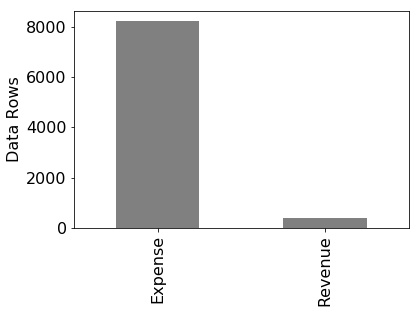

In [5]:
ax = df["Account Type"].value_counts().plot.bar(color="gray")
ax.set_ylabel("Data Rows")
None

In [6]:
df.groupby("Account Type").agg("sum") / 1e6

,2015,2016,2017,2018
Account Type,,,,
Expense,296.353083,306.671924,318.199095,318.061748
Revenue,-27.689442,-31.182302,-34.542493,-27.802613


In [7]:
y18 = df[df["Account Type"] == "Expense"]["2018"]
expense_pos = y18[y18 >= 0].sum()
expense_neg = y18[y18 < 0].sum()
y18 = df[df["Account Type"] == "Revenue"]["2018"]
revenue_pos = y18[y18 >= 0].sum()
revenue_neg = y18[y18 < 0].sum()
exp_rev = {"positive": {"expense": expense_pos, "revenue": revenue_pos},
           "negative": {"expense": -expense_neg, "revenue": -revenue_neg}}
exp_rev_df = DataFrame(exp_rev) / 1e6
exp_rev_df

,positive,negative
expense,321.319695,3.257947
revenue,0.019643,27.822256


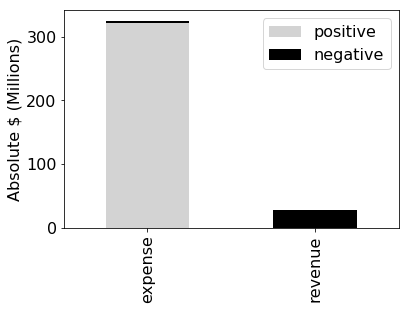

In [8]:
ax = exp_rev_df.plot.bar(stacked=True, color=["lightgray", "black"])
ax.set_ylabel("Absolute $ (Millions)")
None

In [9]:
# how can revenue be positive?
df[(df["Account Type"] == "Revenue") & (df["2018"] > 0)]

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
307,51 - PARKS,51170 - PARK COM REC GOODMAN POOL,Revenue,47 - MISC REVENUE,47190 - MISCELLANEOUS REVENUE,-250.92,-52.72,-52.72,2.51
428,19 - MAYOR,19100 - MAYOR,Revenue,46 - INVEST OTHER CONTRIB,46310 - CONTRIBUTIONS AND DONATIONS,0.00,0.00,-23120.00,43.34
431,62 - COMMUNITY DEVELOPMENT,62441 - YOUTH SERVICES,Revenue,46 - INVEST OTHER CONTRIB,46310 - CONTRIBUTIONS AND DONATIONS,0.00,0.00,-12000.00,8000.00
433,30 - FIRE,30114 - FIRE HAZARDOUS INCIDENT TEAM,Revenue,43 - CHARGES FOR SERVICES,43710 - REIMBURSEMENT OF EXPENSE,0.00,0.00,-10241.20,2762.91
3616,20 - MUNICIPAL COURT,20100 - MUNICIPAL COURT,Revenue,45 - FINE FORFEITURE ASMT,45120 - PARKING VIOLATIONS,422.00,0.00,306.43,535.00
3630,20 - MUNICIPAL COURT,20100 - MUNICIPAL COURT,Revenue,47 - MISC REVENUE,47190 - MISCELLANEOUS REVENUE,428.60,90.10,308.98,203.35
5207,20 - MUNICIPAL COURT,20100 - MUNICIPAL COURT,Revenue,45 - FINE FORFEITURE ASMT,45110 - MOVING VIOLATIONS,2912.00,0.00,838.00,1598.00
6229,20 - MUNICIPAL COURT,20100 - MUNICIPAL COURT,Revenue,45 - FINE FORFEITURE ASMT,45115 - UNIFORM CITATIONS,13436.43,967.00,7007.24,6497.81


# Positive Expenses

In [10]:
expenses = df[(df["Account Type"] == "Expense") & (df["2018"] >= 0)]
expenses.head()

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
11,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,56 - DEBT OTHR FINANCING,56210 - INTEREST,-373356.21,9720.00,0.0,0.0
25,16 - HUMAN RESOURCES,16100 - HR SERVICES,Expense,58 - INTER DEPART BILLING,58116 - ID BILLING TO HUMAN RESOURCES,-194523.00,-203142.00,-203142.0,0.0
44,62 - COMMUNITY DEVELOPMENT,62551 - CD DIVISION 27 PRGM ADMIN,Expense,58 - INTER DEPART BILLING,58120 - ID BILLING TO MUNICIPAL COURT,-91643.00,0.00,0.0,0.0
105,45 - TRAFFIC ENGINEERING,45505 - TE SIGNALS MAINTENANCE,Expense,58 - INTER DEPART BILLING,58117 - ID BILLING TO INFORMATION TEC,-31500.91,0.00,0.0,0.0
135,45 - TRAFFIC ENGINEERING,45505 - TE SIGNALS MAINTENANCE,Expense,58 - INTER DEPART BILLING,58182 - ID BILLING TO PARKING,-17998.50,-3842.66,0.0,0.0


In [11]:
expense_agg = expenses.groupby("Agency").agg("sum") / 1e6
expense_agg.head()

,2015,2016,2017,2018
Agency,,,,
00 - UNDEFINED,63.312809,61.639538,67.066615,58.549477
10 - ASSESSOR,2.329524,2.312123,2.491810,2.671716
11 - ATTORNEY,2.703978,2.775633,2.989084,2.993189
12 - CIVIL RIGHTS,1.239863,1.471954,1.482644,1.740774
13 - CLERK,1.292095,2.394929,2.266173,2.223049


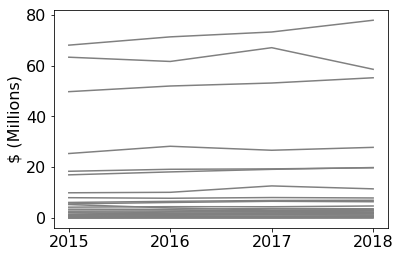

In [12]:
# variance of top categories over years
t = DataFrame(expense_agg.T)
t.set_index(t.index.astype(float), inplace=True)
ax = t.plot.line(legend=False, color="gray")
ax.set_ylabel("$ (Millions)")
None

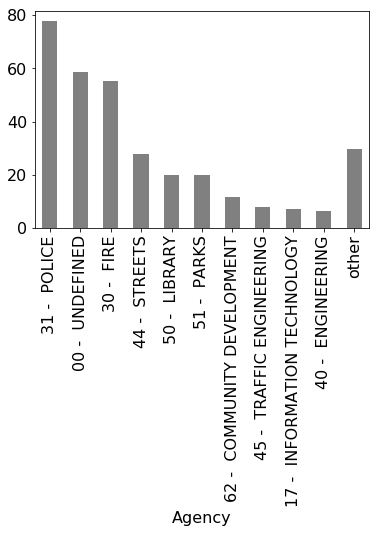

In [13]:
agency_exp = expense_agg["2018"].sort_values(ascending=False)
total = agency_exp.sum()
top10 = agency_exp[:10]
top10["other"] = total - sum(top10)
top10.plot.bar(color="gray")

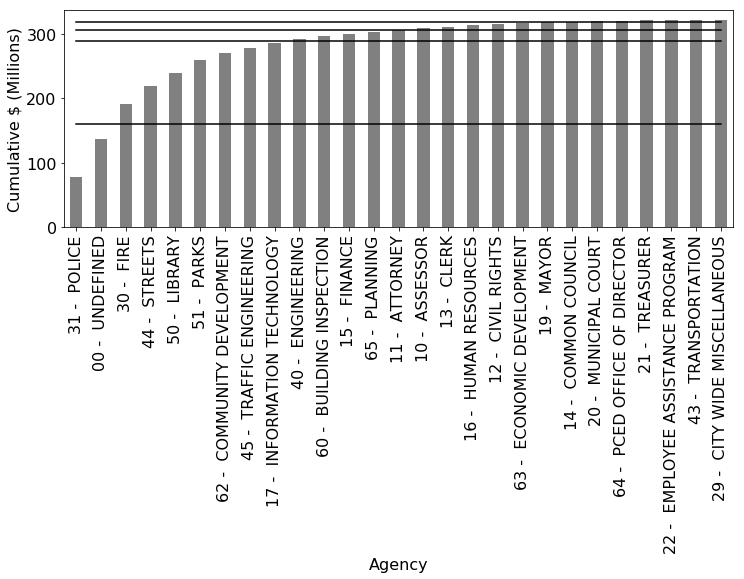

In [14]:
ax = agency_exp.cumsum().plot.bar(color="gray", figsize=(12,4))
ax.set_ylabel("Cumulative $ (Millions)")
for percent in [50, 90, 95, 99]:
    amt = agency_exp.sum() * percent / 100
    plt.plot([0, len(agency_exp)-1], [amt, amt], color="black")

# Undefined Category

In [15]:
undef = (df[df["Agency"] == "00 -  UNDEFINED"]
         .sort_values(by="2018", ascending=False))
for year in range(2015, 2019):
    undef[str(year)] = undef[str(year)] / 1e6
undef.head(8)

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
7403,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,59 - TRANSFER OUT,59130 - TRANSFER OUT TO DEBT SERVICE,37.669343,40.476749,44.321038,47.239110
7396,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,59 - TRANSFER OUT,59140 - TRANSFER OUT TO CAPITAL PROJEC,4.627822,4.060543,3.807485,6.284391
7398,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,59 - TRANSFER OUT,59610 - TRANSFER OUT TO PUBLIC HEALTH,4.788705,4.793266,4.535371,4.238064
7352,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,54 - PURCHASED SERVICES,54815 - GRANTS,0.808815,0.512273,0.138925,0.195573
6970,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,54 - PURCHASED SERVICES,54535 - MEMBERSHIPS,0.077574,0.098193,0.087809,0.093227
6928,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,54 - PURCHASED SERVICES,54645 - CONSULTING SERVICES,0.068531,0.075298,0.072167,0.083768
7223,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,52 - BENEFITS,52310 - UNEMPLOYMENT BENEFITS,0.273448,0.101129,0.118635,0.078528
6758,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,54 - PURCHASED SERVICES,54810 - OTHER SERVICES AND EXPENSES,0.040734,0.267235,0.391895,0.070968


In [16]:
df[df["Character Code"] == "59 - TRANSFER OUT"]

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
5412,31 - POLICE,31155 - TRAFFIC AND SPECIAL SERVICES,Expense,59 - TRANSFER OUT,59123 - TRANSFER OUT TO GRANTS,3867.71,0.00,0.00,0.00
6237,40 - ENGINEERING,40141 - ENG ENV ENG GENERAL,Expense,59 - TRANSFER OUT,59123 - TRANSFER OUT TO GRANTS,13558.81,7454.69,0.00,0.00
6394,31 - POLICE,31100 - POLICE FIELD,Expense,59 - TRANSFER OUT,59123 - TRANSFER OUT TO GRANTS,19147.28,329048.17,274264.94,274069.96
7186,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,59 - TRANSFER OUT,59510 - TRANSFER OUT TO CDA,196244.00,174218.00,176512.00,0.00
7307,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,59 - TRANSFER OUT,59221 - TRANSFER OUT TO INSURANCE,500000.00,1600000.00,0.00,0.00
7336,50 - LIBRARY,50100 - LIB PUBLIC SERVICE,Expense,59 - TRANSFER OUT,59140 - TRANSFER OUT TO CAPITAL PROJEC,680350.51,728843.22,751014.06,0.00
7391,50 - LIBRARY,50100751 - LIB PUBLIC SERVICE CENTRAL,Expense,59 - TRANSFER OUT,59130 - TRANSFER OUT TO DEBT SERVICE,2577189.52,2720544.89,2745462.93,2648130.29
7396,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,59 - TRANSFER OUT,59140 - TRANSFER OUT TO CAPITAL PROJEC,4627822.00,4060543.07,3807485.00,6284391.00
7398,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,59 - TRANSFER OUT,59610 - TRANSFER OUT TO PUBLIC HEALTH,4788705.00,4793266.00,4535371.00,4238064.00
7401,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,59 - TRANSFER OUT,59215 - TRANSFER OUT TO TRANSIT UTILIT,12974926.00,7380384.00,11880431.00,0.00
